In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from collections import Counter
from wordcloud import WordCloud
import nltk
import warnings
warnings.filterwarnings("ignore")

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [2]:
df = pd.read_csv('CaptstoneProjectData_2025.csv')
df.head()

,Subject,Body,Unnamed: 2,Unnamed: 3
0,®Review your shipment details / Shipment Notif...,Notice: This message was sent from outside the...,NaN,NaN
1,Υоur ассоunt іѕ оn hоld,\r\nVotre réponse a bien été prise en compte.\...,NaN,NaN
2,Completed: Invoice # KZ89TYS2564 from-Bestbuy....,Notice: This message was sent from outside the...,NaN,NaN
3,UVic IMPORTANT NOTICE!,Your UVIC account has been filed under the lis...,NaN,NaN
4,You have (6) Suspended incoming messages,\r\n\r\nMessage generated from uvic.ca source...,NaN,NaN


In [3]:
print("Shape:", df.shape)
print("\nColumn Names:", df.columns.tolist())
print("\nMissing values:\n", df.isnull().sum())
print("\nData Types:\n", df.dtypes)
df.sample(3)

Shape: (2576, 4)

Column Names: ['Subject', 'Body', 'Unnamed: 2', 'Unnamed: 3']

Missing values:
 Subject        109
Body             5
Unnamed: 2    2576
Unnamed: 3    2576
dtype: int64

Data Types:
 Subject        object
Body           object
Unnamed: 2    float64
Unnamed: 3    float64
dtype: object


,Subject,Body,Unnamed: 2,Unnamed: 3
2296,"Document shared with you: ""IT. EVALUATION.docx""",Notice: This message was sent from outside the...,NaN,NaN
1714,Grant Reference,Notice: This message was sent from outside the...,NaN,NaN
617,Direct Deposit Advice-University of Victoria,This is an automated message from the Universi...,NaN,NaN


In [4]:
df = df[['Subject', 'Body']]
df.dropna(subset=['Body'], inplace=True)
df.fillna('', inplace=True)
df.reset_index(drop=True, inplace=True)

In [5]:
df['subject_len'] = df['Subject'].apply(len)
df['body_len'] = df['Body'].apply(len)
df['word_count_subject'] = df['Subject'].apply(lambda x: len(x.split()))
df['word_count_body'] = df['Body'].apply(lambda x: len(x.split()))
df.describe()

,subject_len,body_len,word_count_subject,word_count_body
count,2571.000000,2571.000000,2571.000000,2571.000000
mean,31.803578,805.973162,4.458187,89.776352
std,24.866709,1096.750085,3.529104,109.079977
min,0.000000,2.000000,0.000000,0.000000
25%,14.000000,289.000000,2.000000,36.000000
50%,27.000000,530.000000,4.000000,62.000000
75%,44.000000,934.500000,6.000000,109.000000
max,209.000000,16423.000000,35.000000,2651.000000


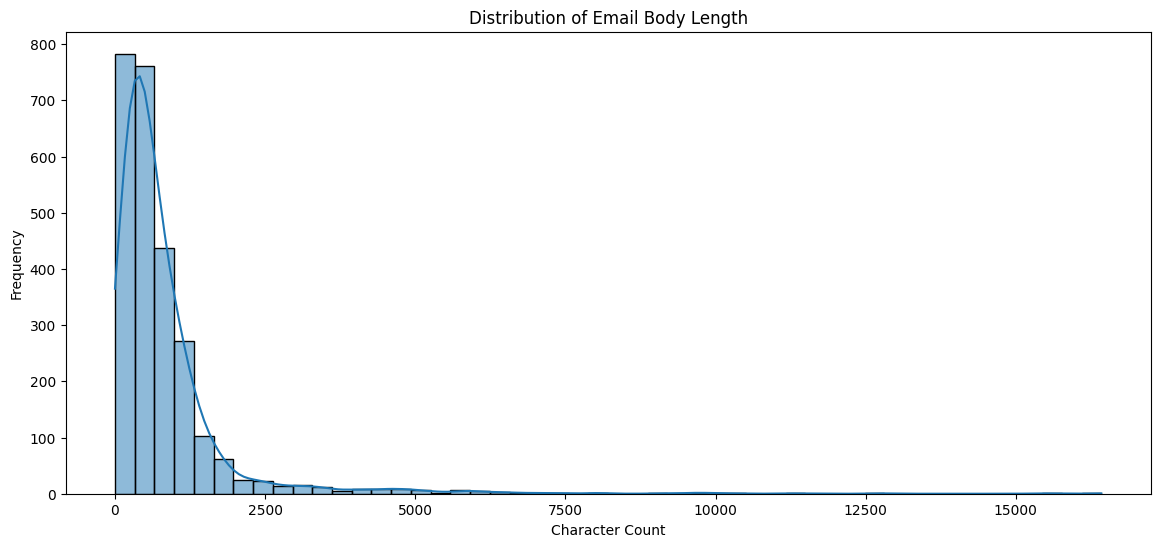

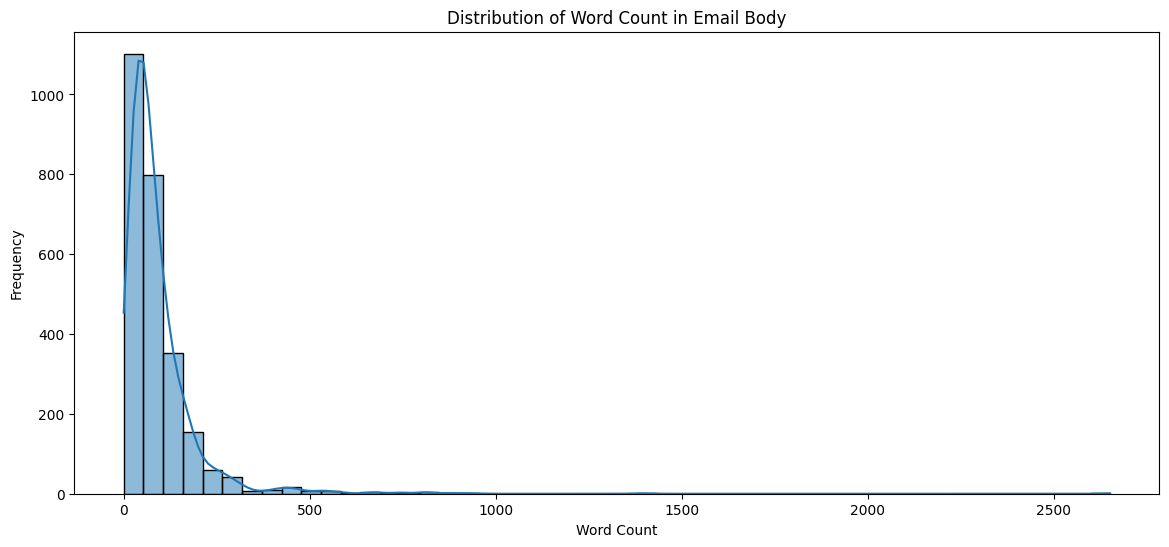

In [6]:
plt.figure(figsize=(14, 6))
sns.histplot(df['body_len'], bins=50, kde=True)
plt.title('Distribution of Email Body Length')
plt.xlabel('Character Count')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(14, 6))
sns.histplot(df['word_count_body'], bins=50, kde=True)
plt.title('Distribution of Word Count in Email Body')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

In [8]:
!pip install nltk
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [9]:
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

stop_words = set(stopwords.words('english'))
def clean_and_tokenize(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    return [w for w in tokens if w not in stop_words and w.isalpha()]

all_subject_words = df['Subject'].apply(clean_and_tokenize).explode()
all_body_words = df['Body'].apply(clean_and_tokenize).explode()

subject_freq = Counter(all_subject_words)
body_freq = Counter(all_body_words)

top_subject = pd.DataFrame(subject_freq.most_common(30), columns=['Word', 'Frequency'])
top_body = pd.DataFrame(body_freq.most_common(30), columns=['Word', 'Frequency'])

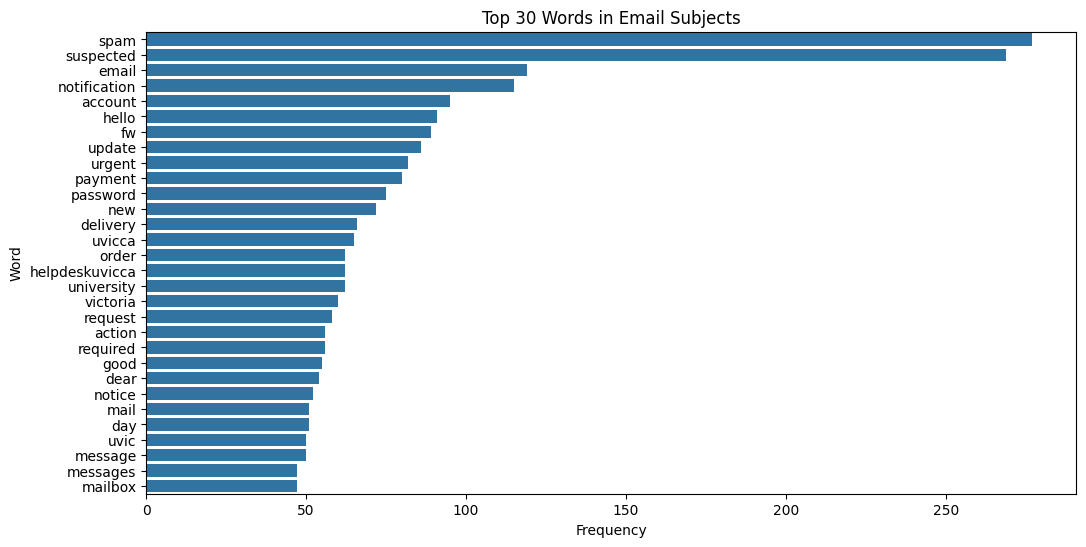

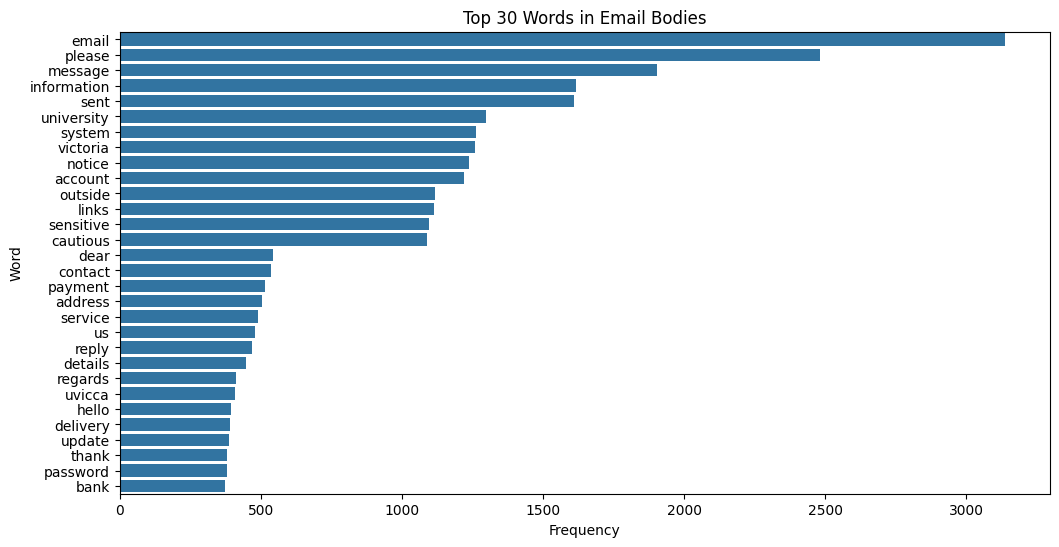

In [10]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Frequency', y='Word', data=top_subject)
plt.title('Top 30 Words in Email Subjects')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Frequency', y='Word', data=top_body)
plt.title('Top 30 Words in Email Bodies')
plt.show()

In [11]:
urgency_keywords = [
    'urgent', 'suspend', 'suspended', 'immediately', 'verify', 'update',
    'password', 'account', 'alert', 'security', 'hold', 'unauthorized',
    'important', 'risk', 'limited', 'action required', 'click', 'failure',
    'warning', 'expired', 'confirm', 'attention', 'deadline'
]

def count_urgency_terms(text):
    text = text.lower()
    return sum(word in text for word in urgency_keywords)

df['urgency_score'] = df['Body'].apply(count_urgency_terms)

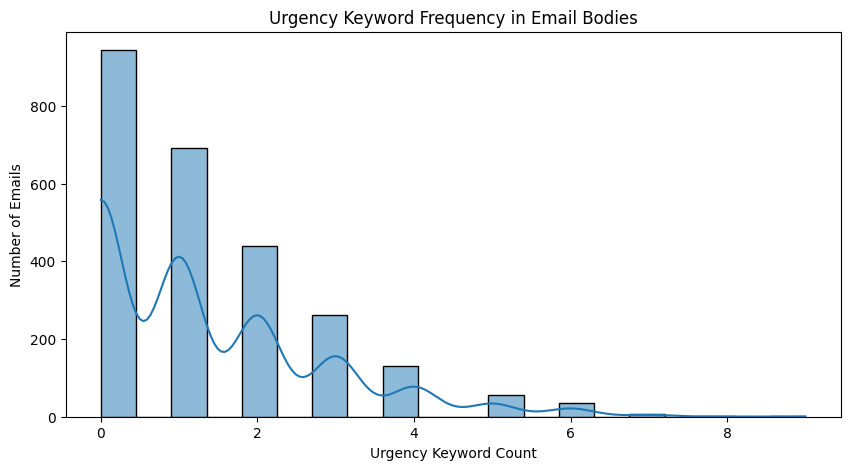

In [12]:
plt.figure(figsize=(10, 5))
sns.histplot(df['urgency_score'], bins=20, kde=True)
plt.title('Urgency Keyword Frequency in Email Bodies')
plt.xlabel('Urgency Keyword Count')
plt.ylabel('Number of Emails')
plt.show()

In [13]:
df.sort_values(by='urgency_score', ascending=False)[['Subject', 'urgency_score']].head(10)

,Subject,urgency_score
2083,IT Support - Account Update,9
624,Uvic Outlook 2022,8
1827,Notice of 11 Suspended Messages,7
1282,***SPAM Suspected*** Notice : 11 Pending Messages,7
1291,⚠️ Action required anthtwo@uvic.ca,7
1284,NOTICE- You have 11 Blocked Mails,7
1285,***SPAM Suspected*** NOTICE- You have 11 Block...,7
1975,INSTRUCTION/ WARNING FROM CENTRAL BANK,7
4,You have (6) Suspended incoming messages,7
1838,Action Required,7


In [14]:
def tag_presence(text, tag):
    return int(f"<{tag}" in text.lower())

df['has_html'] = df['Body'].apply(lambda x: int('<html' in x.lower()))
df['has_script'] = df['Body'].apply(lambda x: tag_presence(x, 'script'))
df['has_form'] = df['Body'].apply(lambda x: tag_presence(x, 'form'))
df['has_iframe'] = df['Body'].apply(lambda x: tag_presence(x, 'iframe'))
df['has_onclick'] = df['Body'].apply(lambda x: 'onclick=' in x.lower())

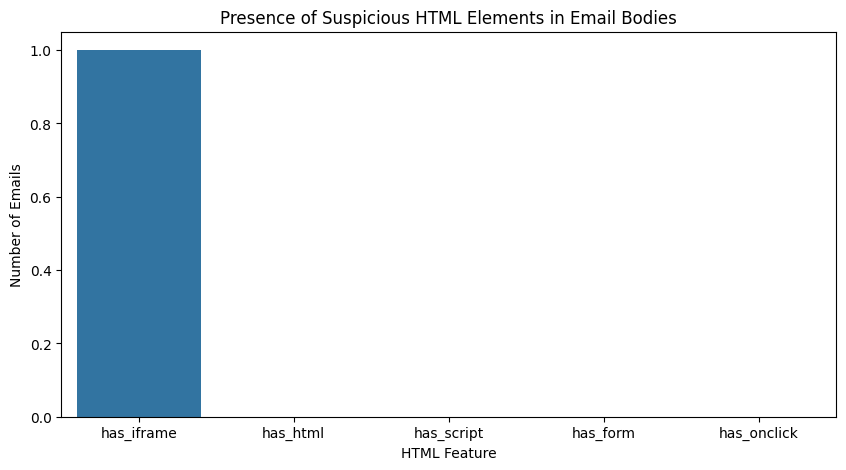

In [15]:
html_tags = ['has_html', 'has_script', 'has_form', 'has_iframe', 'has_onclick']
tag_counts = df[html_tags].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=tag_counts.index, y=tag_counts.values)
plt.title('Presence of Suspicious HTML Elements in Email Bodies')
plt.ylabel('Number of Emails')
plt.xlabel('HTML Feature')
plt.show()

In [16]:
import hashlib

def hash_email(text):
    return hashlib.md5(text.strip().lower().encode()).hexdigest()

df['body_hash'] = df['Body'].apply(hash_email)

duplicate_hashes = df['body_hash'].duplicated(keep=False)
df['is_duplicate'] = duplicate_hashes.astype(int)

df['is_duplicate'].value_counts()

,count
is_duplicate,
0,2148
1,423


In [17]:
import math

def shannon_entropy(text):
    if not text:
        return 0
    frequency = Counter(text)
    total = len(text)
    entropy = -sum((count / total) * math.log2(count / total) for count in frequency.values())
    return entropy

df['entropy'] = df['Body'].apply(shannon_entropy)

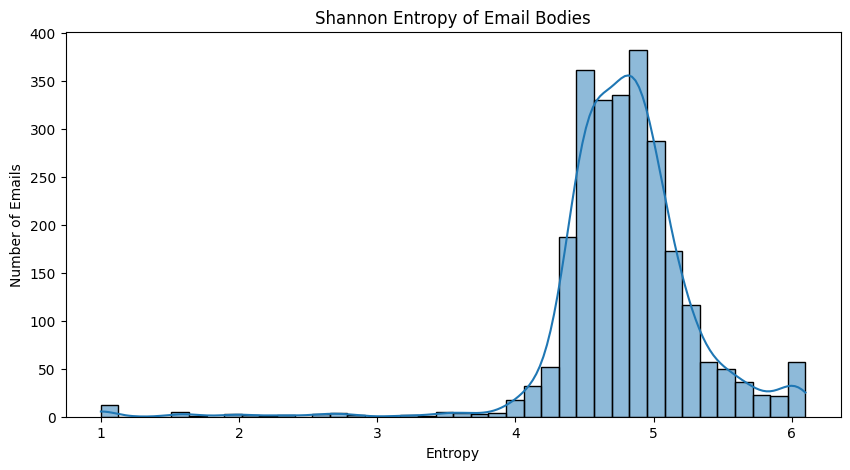

In [18]:
plt.figure(figsize=(10, 5))
sns.histplot(df['entropy'], bins=40, kde=True)
plt.title('Shannon Entropy of Email Bodies')
plt.xlabel('Entropy')
plt.ylabel('Number of Emails')
plt.show()

In [25]:
import nltk
from nltk import pos_tag, word_tokenize
from nltk.corpus import stopwords
from collections import Counter

nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def get_pos_tokens(text):
    tokens = word_tokenize(text.lower())
    tokens = [t for t in tokens if t.isalpha() and t not in stop_words]
    return pos_tag(tokens)

df['pos_tags'] = df['Body'].apply(get_pos_tokens)

def extract_pos(tagged, prefix):
    return [word for word, pos in tagged if pos.startswith(prefix)]

all_verbs = df['pos_tags'].apply(lambda tags: extract_pos(tags, 'VB')).explode()
all_nouns = df['pos_tags'].apply(lambda tags: extract_pos(tags, 'NN')).explode()
all_adjs = df['pos_tags'].apply(lambda tags: extract_pos(tags, 'JJ')).explode()

top_verbs = pd.DataFrame(Counter(all_verbs).most_common(20), columns=['Verb', 'Frequency'])
top_nouns = pd.DataFrame(Counter(all_nouns).most_common(20), columns=['Noun', 'Frequency'])
top_adjs = pd.DataFrame(Counter(all_adjs).most_common(20), columns=['Adjective', 'Frequency'])

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


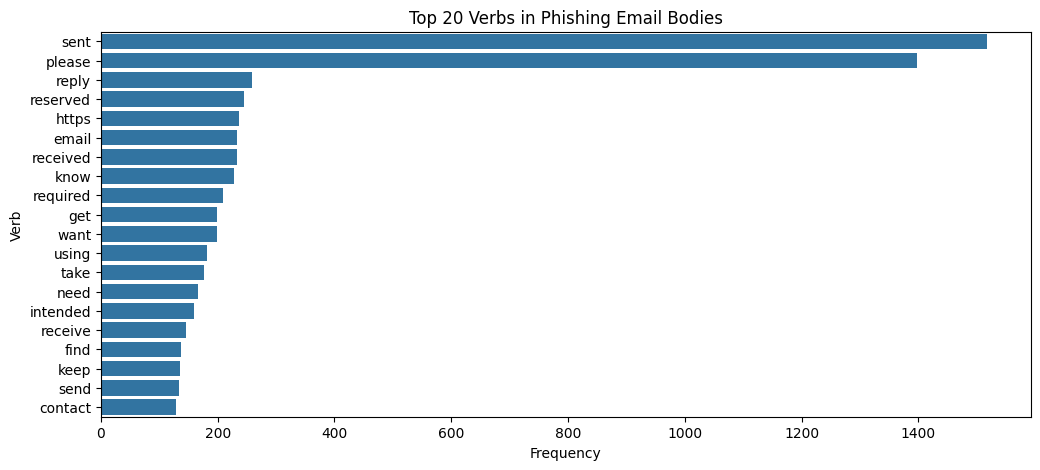

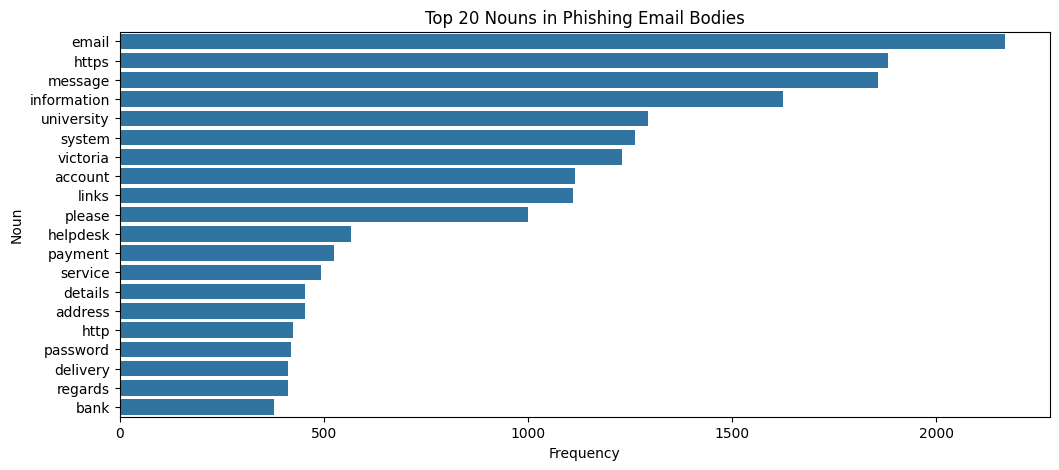

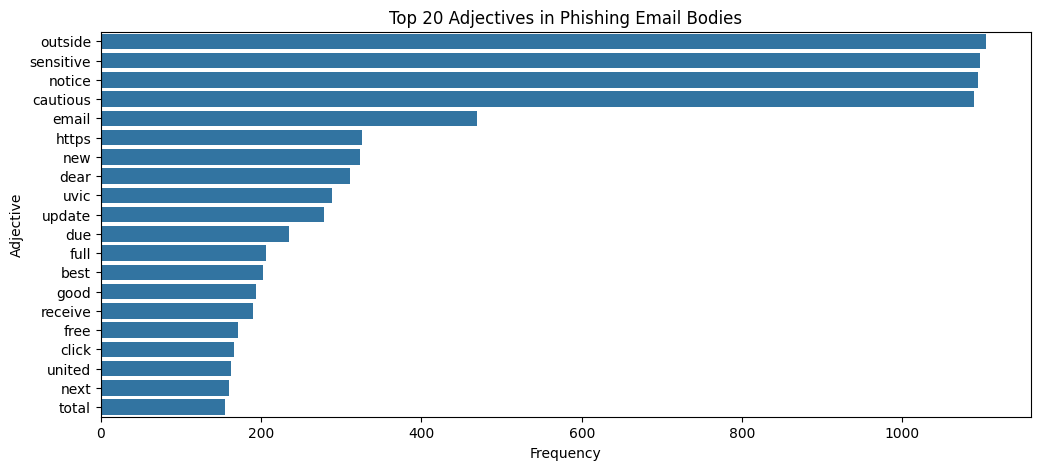

In [26]:
plt.figure(figsize=(12, 5))
sns.barplot(data=top_verbs, x='Frequency', y='Verb')
plt.title('Top 20 Verbs in Phishing Email Bodies')
plt.show()

plt.figure(figsize=(12, 5))
sns.barplot(data=top_nouns, x='Frequency', y='Noun')
plt.title('Top 20 Nouns in Phishing Email Bodies')
plt.show()

plt.figure(figsize=(12, 5))
sns.barplot(data=top_adjs, x='Frequency', y='Adjective')
plt.title('Top 20 Adjectives in Phishing Email Bodies')
plt.show()

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer_2gram = CountVectorizer(ngram_range=(2, 2), stop_words='english', max_features=25)
X2 = vectorizer_2gram.fit_transform(df['Body'])
bigrams = pd.DataFrame({'Bigram': vectorizer_2gram.get_feature_names_out(), 'Count': X2.sum(axis=0).A1})

vectorizer_3gram = CountVectorizer(ngram_range=(3, 3), stop_words='english', max_features=25)
X3 = vectorizer_3gram.fit_transform(df['Body'])
trigrams = pd.DataFrame({'Trigram': vectorizer_3gram.get_feature_names_out(), 'Count': X3.sum(axis=0).A1})

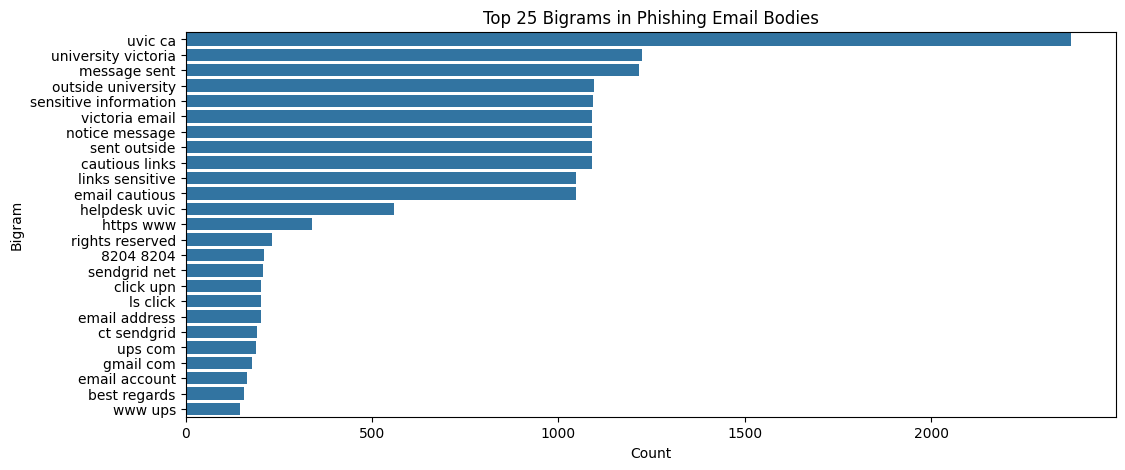

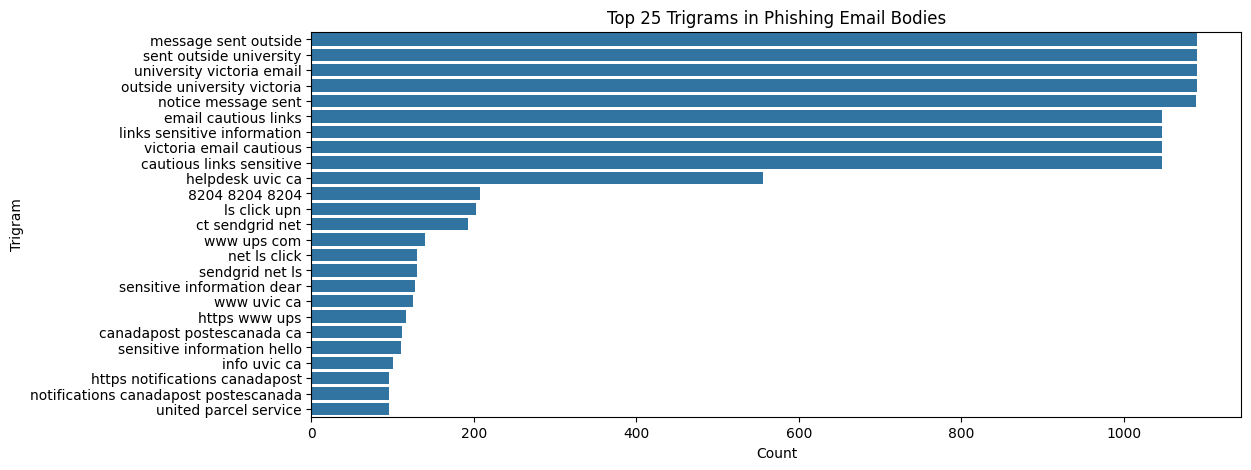

In [28]:
plt.figure(figsize=(12, 5))
sns.barplot(data=bigrams.sort_values(by='Count', ascending=False), x='Count', y='Bigram')
plt.title('Top 25 Bigrams in Phishing Email Bodies')
plt.show()

plt.figure(figsize=(12, 5))
sns.barplot(data=trigrams.sort_values(by='Count', ascending=False), x='Count', y='Trigram')
plt.title('Top 25 Trigrams in Phishing Email Bodies')
plt.show()

In [30]:
!pip install textstat
import textstat

df['flesch_reading'] = df['Body'].apply(textstat.flesch_reading_ease)
df['gunning_fog'] = df['Body'].apply(textstat.gunning_fog)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.3/105.3 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 939.4/939.4 kB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 69.5 MB/s eta 0:00:00


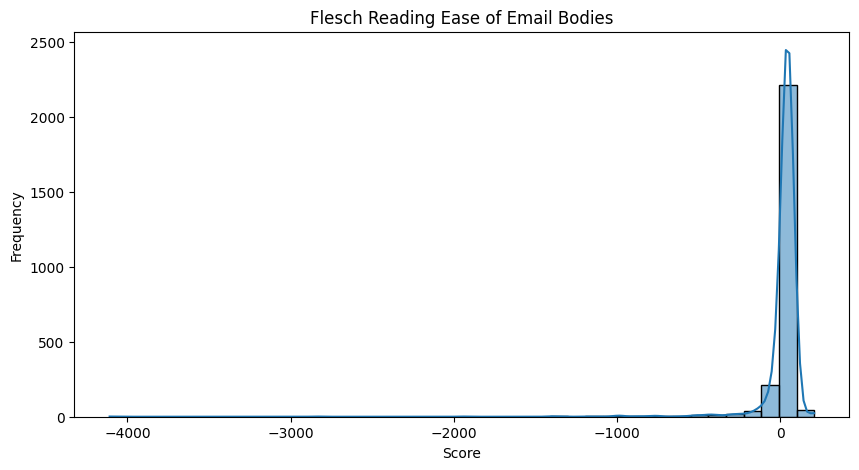

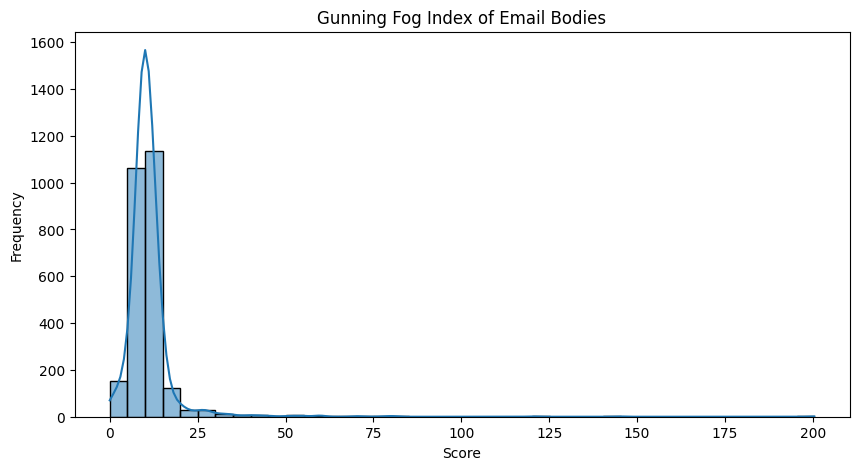

In [31]:
plt.figure(figsize=(10, 5))
sns.histplot(df['flesch_reading'], bins=40, kde=True)
plt.title('Flesch Reading Ease of Email Bodies')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(df['gunning_fog'], bins=40, kde=True)
plt.title('Gunning Fog Index of Email Bodies')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

In [32]:
df['exclamation_count'] = df['Body'].str.count('!')
df['question_count'] = df['Body'].str.count('\?')
df['period_count'] = df['Body'].str.count('\.')
df['comma_count'] = df['Body'].str.count(',')

punct_df = df[['exclamation_count', 'question_count', 'period_count', 'comma_count']]
punct_df.describe()

,exclamation_count,question_count,period_count,comma_count
count,2571.000000,2571.000000,2571.000000,2571.000000
mean,0.213536,0.742513,11.443018,3.421626
std,0.877689,1.778114,21.314966,5.990166
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,4.000000,1.000000
50%,0.000000,0.000000,8.000000,2.000000
75%,0.000000,1.000000,12.000000,4.000000
max,16.000000,28.000000,681.000000,134.000000


In [33]:
def passive_heuristic(text):
    return int(bool(re.search(r'\b(be|been|being|is|was|were|are)\b\s+\w+ed\b', text.lower())))

df['passive_voice'] = df['Body'].apply(passive_heuristic)
df['passive_voice'].value_counts()

,count
passive_voice,
0,1505
1,1066


In [34]:
df['is_html_email'] = df['Body'].str.contains('<html', case=False).astype(int)
df['is_html_email'].value_counts(normalize=True)

,proportion
is_html_email,
0,1.0


In [35]:
df['num_anchors'] = df['Body'].str.count('<a ')
df['num_imgs'] = df['Body'].str.count('<img')
df['num_forms'] = df['Body'].str.count('<form')
df['num_scripts'] = df['Body'].str.count('<script')
df['num_onclicks'] = df['Body'].str.count('onclick=')

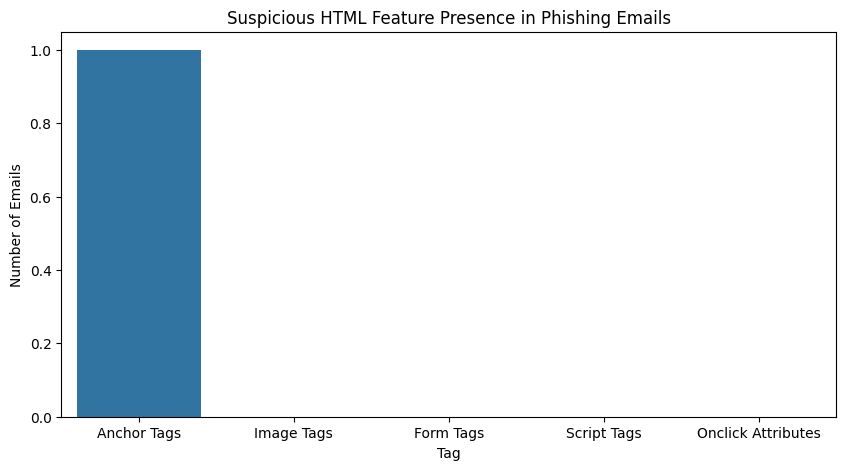

In [36]:
tag_counts = {
    'Anchor Tags': df['num_anchors'].gt(0).sum(),
    'Image Tags': df['num_imgs'].gt(0).sum(),
    'Form Tags': df['num_forms'].gt(0).sum(),
    'Script Tags': df['num_scripts'].gt(0).sum(),
    'Onclick Attributes': df['num_onclicks'].gt(0).sum()
}

tag_df = pd.DataFrame(list(tag_counts.items()), columns=['Tag', 'Count'])

plt.figure(figsize=(10, 5))
sns.barplot(data=tag_df, x='Tag', y='Count')
plt.title('Suspicious HTML Feature Presence in Phishing Emails')
plt.ylabel('Number of Emails')
plt.show()

In [38]:
import re

def extract_links(text):
    return re.findall(r'https?://[^\s\'"<>]+', str(text))

df['links'] = df['Body'].apply(extract_links)

In [39]:
from urllib.parse import urlparse

def get_subdomain_depth(url):
    try:
        domain = urlparse(url).netloc
        return domain.count('.')
    except:
        return 0

df['max_subdomains'] = df['links'].apply(lambda links: max([get_subdomain_depth(link) for link in links], default=0))

In [40]:
emotion_keywords = [
    'urgent', 'immediately', 'suspended', 'failure', 'alert', 'important', 'verify',
    'update', 'click', 'unauthorized', 'risk', 'security', 'confirm', 'limited',
    'action', 'required', 'deadline', 'reactivate', 'compromised'
]

def emotion_density(text):
    words = text.lower().split()
    emotion_count = sum(1 for word in words if word in emotion_keywords)
    if len(words) == 0:
        return 0
    return (emotion_count / len(words)) * 100

df['emotion_density'] = df['Body'].apply(emotion_density)

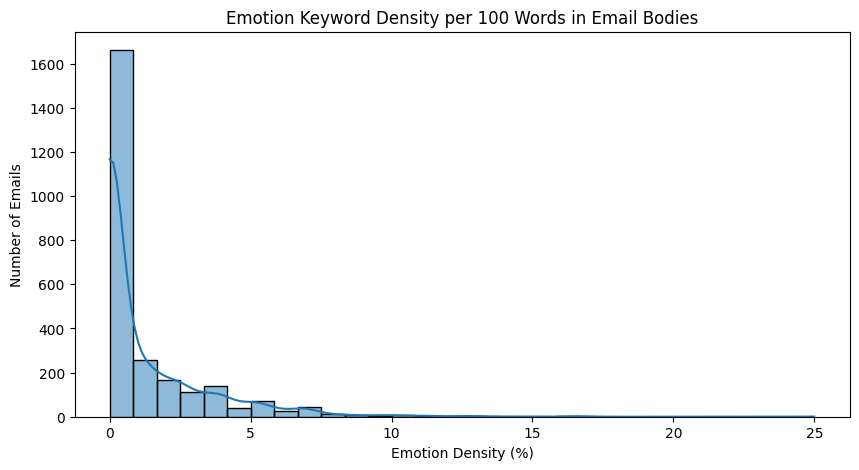

In [41]:
plt.figure(figsize=(10, 5))
sns.histplot(df['emotion_density'], bins=30, kde=True)
plt.title('Emotion Keyword Density per 100 Words in Email Bodies')
plt.xlabel('Emotion Density (%)')
plt.ylabel('Number of Emails')
plt.show()

In [42]:
threat_words = ['suspend', 'failure', 'unauthorized', 'deactivate', 'block', 'alert', 'compromised']
reward_words = ['congratulations', 'reward', 'bonus', 'gift', 'free', 'won', 'claim']

def persuasion_theme(text):
    text = text.lower()
    threat = any(word in text for word in threat_words)
    reward = any(word in text for word in reward_words)
    if threat and reward:
        return 'Both'
    elif threat:
        return 'Threat'
    elif reward:
        return 'Reward'
    else:
        return 'Neutral'

df['persuasion_theme'] = df['Body'].apply(persuasion_theme)
df['persuasion_theme'].value_counts()

,count
persuasion_theme,
Neutral,1877
Reward,356
Threat,281
Both,57


In [43]:
def greeting_type(body):
    text = body.lower().strip()
    if text.startswith(('dear user', 'dear customer', 'dear valued', 'hello', 'hi')):
        return 'Generic'
    elif text.startswith('dear'):
        return 'Personalized'
    else:
        return 'No Greeting'

df['greeting_type'] = df['Body'].apply(greeting_type)
df['greeting_type'].value_counts()

,count
greeting_type,
No Greeting,2191
Generic,254
Personalized,126


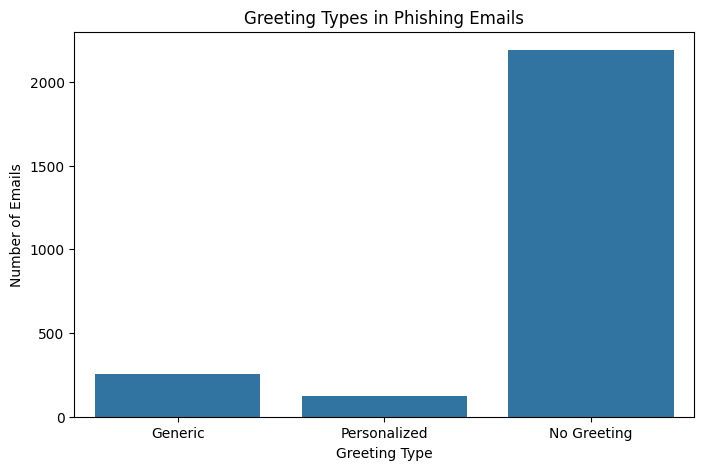

In [44]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='greeting_type', order=['Generic', 'Personalized', 'No Greeting'])
plt.title('Greeting Types in Phishing Emails')
plt.ylabel('Number of Emails')
plt.xlabel('Greeting Type')
plt.show()

In [45]:
df['links_per_100_words'] = df.apply(
    lambda row: (len(row['links']) / len(row['Body'].split()) * 100) if len(row['Body'].split()) > 0 else 0,
    axis=1
)

In [46]:
df['has_base64'] = df['Body'].str.contains('base64,', case=False).astype(int)

def is_image_only(text):
    stripped = re.sub(r'<[^>]+>', '', text)
    return int(len(stripped.strip()) < 20)

df['image_only'] = df['Body'].apply(is_image_only)

In [47]:
attachment_extensions = ['.html', '.htm', '.xlsm', '.js', '.vbs', '.zip', '.exe', '.scr']

def contains_attachment(text):
    found = [ext for ext in attachment_extensions if ext in text.lower()]
    return ', '.join(found) if found else None

df['suspicious_attachments'] = df['Body'].apply(contains_attachment)
df['has_suspicious_attachment'] = df['suspicious_attachments'].notnull().astype(int)

In [48]:
shorteners = ['bit.ly', 'tinyurl', 't.co', 'ow.ly', 'is.gd', 'buff.ly', 'goo.gl']
free_hosts = ['weebly.com', 'wixsite.com', 'wordpress.com', 'googleusercontent.com']

def detect_shorteners(links):
    return int(any(any(s in link for s in shorteners) for link in links))

def detect_free_hosts(links):
    return int(any(any(f in link for f in free_hosts) for link in links))

df['uses_shortened_url'] = df['links'].apply(detect_shorteners)
df['uses_free_host'] = df['links'].apply(detect_free_hosts)

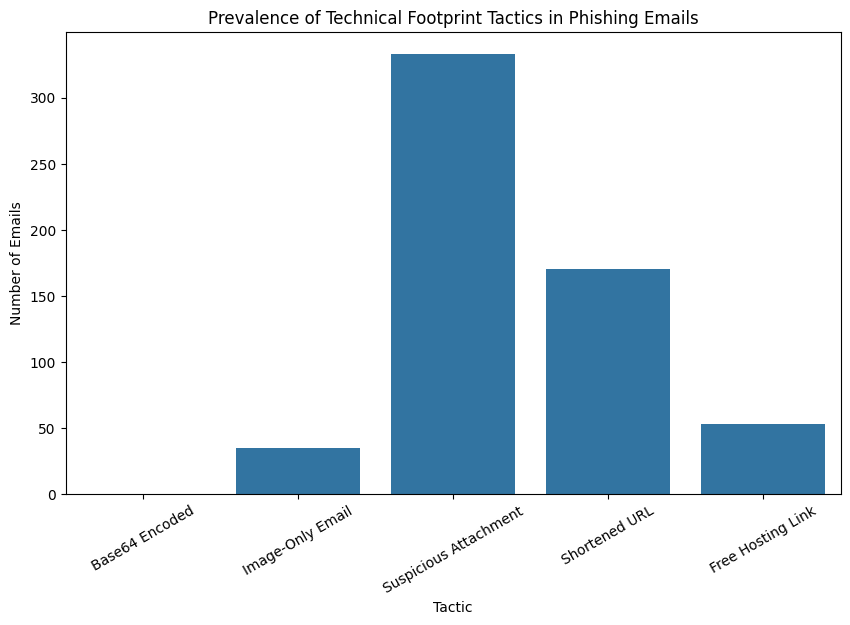

In [49]:
tactic_counts = {
    'Base64 Encoded': df['has_base64'].sum(),
    'Image-Only Email': df['image_only'].sum(),
    'Suspicious Attachment': df['has_suspicious_attachment'].sum(),
    'Shortened URL': df['uses_shortened_url'].sum(),
    'Free Hosting Link': df['uses_free_host'].sum()
}

tactics_df = pd.DataFrame.from_dict(tactic_counts, orient='index', columns=['Count']).reset_index()
tactics_df.columns = ['Tactic', 'Count']

plt.figure(figsize=(10, 6))
sns.barplot(data=tactics_df, x='Tactic', y='Count')
plt.title('Prevalence of Technical Footprint Tactics in Phishing Emails')
plt.ylabel('Number of Emails')
plt.xticks(rotation=30)
plt.show()

In [51]:
import re

def extract_links(text):
    return re.findall(r'https?://[^\s\'"<>]+', str(text))

df['links'] = df['Body'].apply(extract_links)
df['num_links'] = df['links'].apply(len)

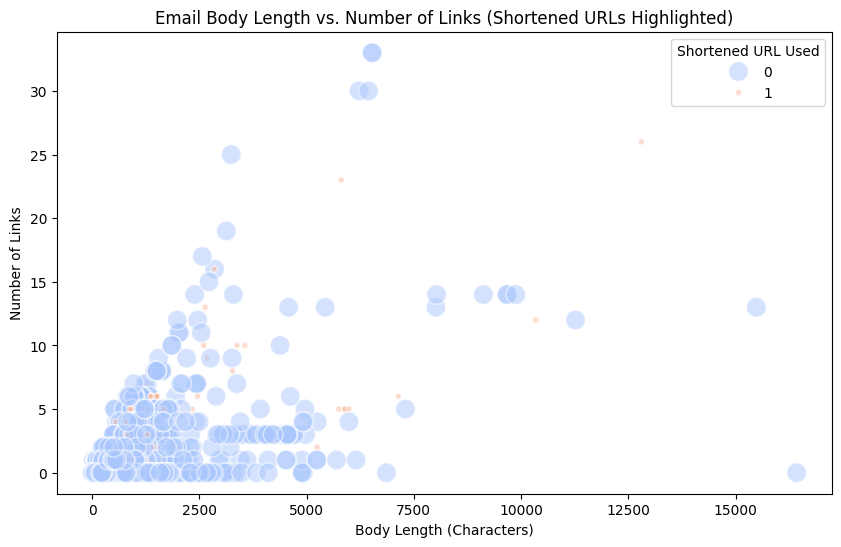

In [52]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='body_len',
    y='num_links',
    size='uses_shortened_url',
    hue='uses_shortened_url',
    sizes=(20, 200),
    alpha=0.5,
    palette='coolwarm'
)
plt.title('Email Body Length vs. Number of Links (Shortened URLs Highlighted)')
plt.xlabel('Body Length (Characters)')
plt.ylabel('Number of Links')
plt.legend(title='Shortened URL Used', loc='upper right')
plt.show()

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

subject_vectorizer = TfidfVectorizer(stop_words='english')
subject_matrix = subject_vectorizer.fit_transform(df['Subject'].fillna(''))

cosine_sim_matrix = cosine_similarity(subject_matrix)

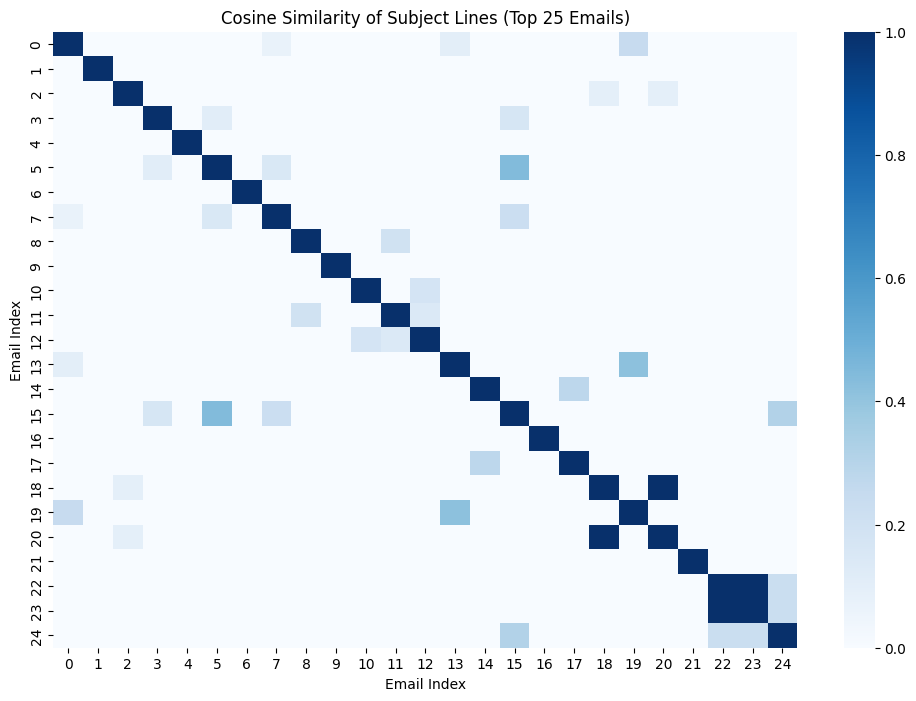

In [54]:
import seaborn as sns

similarity_df = pd.DataFrame(cosine_sim_matrix[:25, :25])
plt.figure(figsize=(12, 8))
sns.heatmap(similarity_df, cmap='Blues')
plt.title('Cosine Similarity of Subject Lines (Top 25 Emails)')
plt.xlabel('Email Index')
plt.ylabel('Email Index')
plt.show()

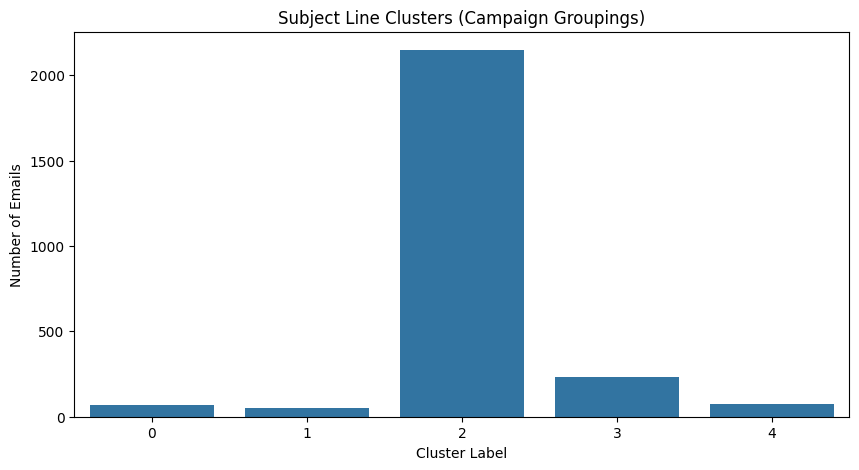

In [55]:
from sklearn.cluster import KMeans

n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['subject_cluster'] = kmeans.fit_predict(subject_matrix)

plt.figure(figsize=(10, 5))
sns.countplot(x='subject_cluster', data=df)
plt.title('Subject Line Clusters (Campaign Groupings)')
plt.xlabel('Cluster Label')
plt.ylabel('Number of Emails')
plt.show()

In [58]:
import re

def has_ip_link(links):
    return int(any(re.match(r'https?://(\d{1,3}\.){3}\d{1,3}', link) for link in links))

df['has_ip_link'] = df['links'].apply(has_ip_link)

In [60]:
signature_matrix = {
    'Feature': [
        'Contains IP-based URL',
        'Uses Shortened URL',
        'Links to Free Host',
        'Starts with “Dear Customer”',
        'Contains HTML Anchor Tags',
        'Contains Base64 Content',
        'Image-Only Email',
        'Has Suspicious Attachment',
        'Uses Passive Voice',
        'Includes Threat Words',
        'Includes Reward Words'
    ],
    '% Emails with Trait': [
        round(df['has_ip_link'].mean() * 100, 1),
        round(df['uses_shortened_url'].mean() * 100, 1),
        round(df['uses_free_host'].mean() * 100, 1),
        round((df['Body'].str.lower().str.startswith('dear customer')).mean() * 100, 1),
        round((df['num_anchors'] > 0).mean() * 100, 1),
        round(df['has_base64'].mean() * 100, 1),
        round(df['image_only'].mean() * 100, 1),
        round(df['has_suspicious_attachment'].mean() * 100, 1),
        round(df['passive_voice'].mean() * 100, 1),
        round((df['persuasion_theme'] == 'Threat').mean() * 100, 1),
        round((df['persuasion_theme'] == 'Reward').mean() * 100, 1)
    ]
}

signature_df = pd.DataFrame(signature_matrix)
signature_df

,Feature,% Emails with Trait
0,Contains IP-based URL,0.4
1,Uses Shortened URL,6.6
2,Links to Free Host,2.1
3,Starts with “Dear Customer”,0.2
4,Contains HTML Anchor Tags,0.0
5,Contains Base64 Content,0.0
6,Image-Only Email,1.4
7,Has Suspicious Attachment,13.0
8,Uses Passive Voice,41.5
9,Includes Threat Words,10.9


In [61]:
signature_df.to_csv("signature_matrix.csv", index=False)

In [62]:
df.to_csv("phishing_analyzed_dataset.csv", index=False)